### Carga de paquetes.
Se carga todo lo requerido al importar el archivo System de la carpeta src.

In [1]:
from src.System import *

#### Crear redes
Las redes (Lattices) son los cristales que forman las estructuras modeladas por los sistemas creados, tenemos dos formas para crear redes:

La primera es crear manualmente la red indicando los vectores primitivos (PV) de esta, la lista de átomos en su base atómica (esta debe ser una lista de objetos de clase Atom con sus posiciones relativas segun los PVs de la red).
Tambien se puede hacer uso de las instrucciones hexa3(),hexa6() y rectLattice para crear redes hexagonales (con simetrias S3 o S6) y rectangulares, donde sólo indicaremos el tamaño de el/los periodos. Igualmente se cuenta con redes precreadas que se pueden usar (grafeno y fosforeno negro).

A continuación se creará una Lattice para beta-GeSe de forma manual.

+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-
b-GeSe
1.0
        3.8261001110         0.0000000000         0.0000000000
        0.0000000000         5.8088998795         0.0000000000
        0.0000000000         0.0000000000         18.0892009735
	Ge	Se
	2	2
Direct
         0.7500000000         0.3677821160         0.1606478230
         0.2500000000         0.8684009310         0.0634941810
         0.7500000000         0.8466233610         0.1609372630
         0.2500000000         0.3469434380         0.0631845500
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-


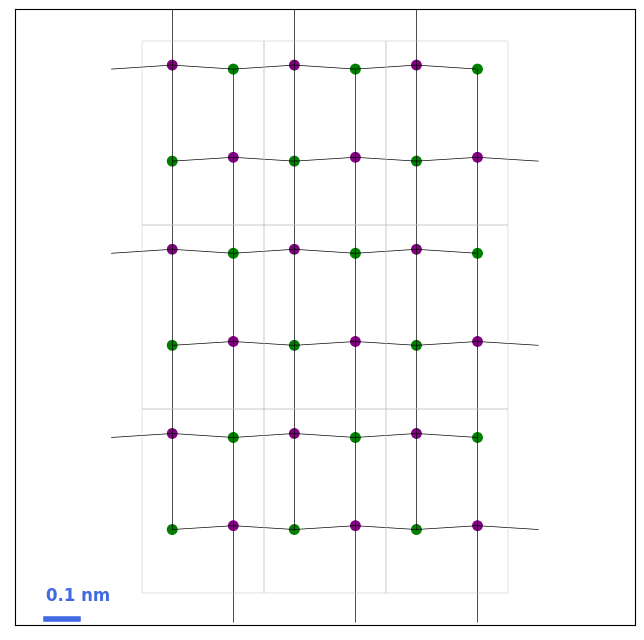

In [2]:
# Base atómica de la red.
pos1,pos2,pos3,pos4=(0.750000000,0.367782116),(0.250000000,0.868400931),(0.750000000,0.846623361),(0.250000000,0.346943438)
atomos=[Atom(pos1,posZ=0.160547823,color='purple',sig='Ge'),
        Atom(pos2,posZ=0.063394181,color='purple',sig='Ge'),
        Atom(pos3,posZ=0.160837263,color='green',sig='Se'),
        Atom(pos4,posZ=0.063084550,color='green',sig='Se')]
# Enlaces de los átomos en la base (opcional)
enlaces=[(pos1,pos3),(pos1,pos4),(pos1,sumaV(pos4,(1,0))),(pos1,sumaV(pos3,(0,-1))),
         (pos2,pos4),(pos2,pos3),(pos2,sumaV(pos3,(-1,0))),(pos2,sumaV(pos4,(0,1)))]
# Vectores primitivos de la red
vA, vB = (3.8261001110,0.0000000000), (0.0000000000,5.8088998795)
# Inicialización de la Red
bGeSe = Lattice(vA,vB,atms=atomos,enls=enlaces,detachment=18.0892009735,name='b-GeSe')
#Muestra en pantalla de los resultados
print("+-"*40+"\n"+bGeSe.showData()+"\n"+"+-"*40)
bGeSe.showme(x=3,y=3)

La segunda forma es mediante el comando importLattice(), en este caso se carga un archivo POSCAR guardado en la raiz del programa.

**En este caso, a menos que se agreguen manualmente, los enlaces atómicos no se imprimen dado que no se calculan automaticamente.*

Se leerá el archivo FePS3.vasp
--Red creada a partir del archivo 'FePS3.vasp'--
Se leerá el archivo graphene.vasp
--Red creada a partir del archivo 'graphene.vasp'--
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-
FePS3
1.0
        5.9314999580         0.0000000000         0.0000000000
        -2.9657499790         5.1368296462         0.0000000000
        0.0000000000         0.0000000000         20.0000000000
	Fe	P	S
	2	2	6
Direct
         0.0000000000         0.0000000000         0.5001000000
         0.6666666870         0.3333333430         0.5001000000
         0.3333333430         0.6666666870         0.4451491070
         0.3333333430         0.6666666870         0.5550508930
         0.3333333430         0.3302960990         0.4212900530
         0.3333333430         0.0030372400         0.5789099770
         0.9969627860         0.6666666870         0.4212900530
         0.9969627860         0.3302960990         0.5789099770
         0.6697039

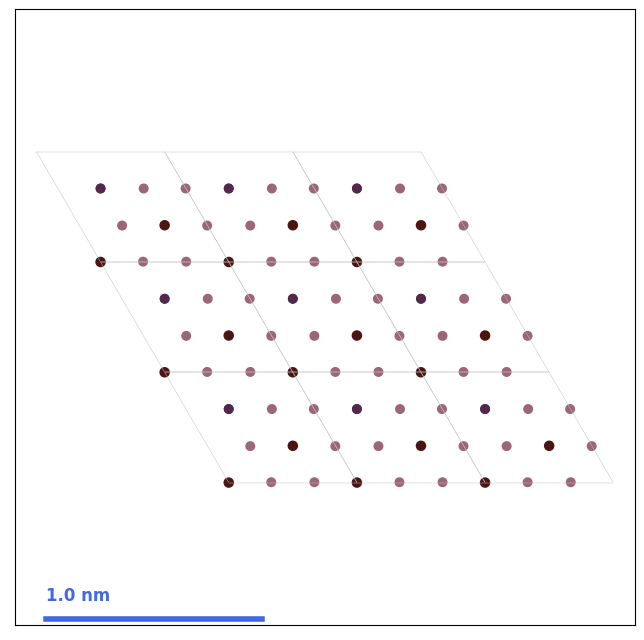

+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-
Graphene
1.0
        2.4672000408         0.0000000000         0.0000000000
        -1.2336000204         2.1366579116         0.0000000000
        0.0000000000         0.0000000000         20.0000000000
	C
	2
Direct
         0.3333333430         0.6666666870         0.5001000000
         0.6666666870         0.3333333430         0.5001000000
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-


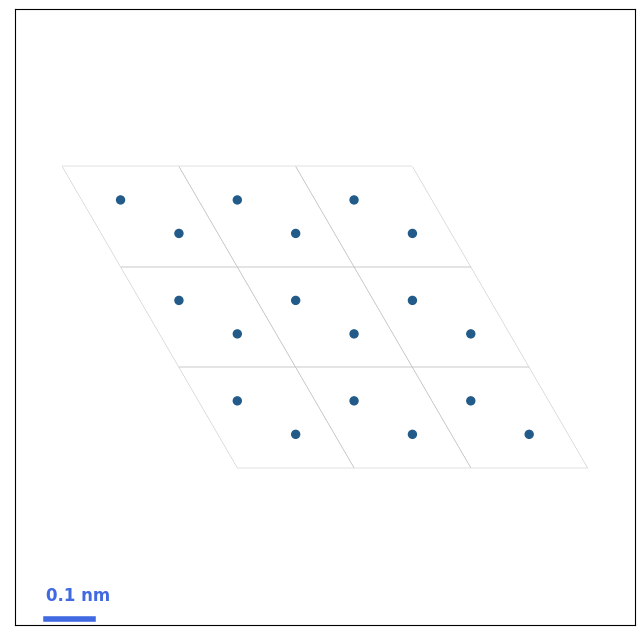

In [3]:
# Importamos los archivos POSCAR de FePS3 y Graphene dados
l1=importLattice("FePS3")
l2=importLattice("graphene")

# Renombramos para tener los nombres correctos
l1.name="FePS3"
l2.name="Graphene"

#Muestra en pantalla de los resultados
print("+-"*40+"\n"+l1.showData()+"\n"+"+-"*40)
l1.showme(x=3,y=3)
print("+-"*40+"\n"+l2.showData()+"\n"+"+-"*40)
l2.showme(x=3,y=3)

#### Creación y funciones para el sistema

Se modela la estructura mediante la creación de un *Sistema* señalando en una lista las redes que lo conforman, entonces podemos buscar una celda primitiva(PC) para este. Puede hacerce sitematicamente ejecutando las funciones searchLP() y calculateTM(), es en la primera donde se dan los parametros de la busqueda, rangeOfSearch y epsilon, que determinan respectivamente el alcance de la búsqueda y el error máximo aceptado. Teniendo esos resultados se puede ejecutar la función muestra(), esta desplegará tablas con la descripción de las PCs generadas por las matrices de transformación calculadas.

Puede ejecutarse sólamente la función muestra(), en ese caso el cálculo se hará con los parametros por default ( n=15
  y  𝜖=0.05
 ).

A continuación crearemos y evaluaremos posibles PCs para un sistema de  𝐹𝑒𝑃𝑆3
  y Grafeno con un ángulo entre sus capas de  24.07°
  (esta es una de las opciones dadas por la función analyze()).

In [4]:
#Inicializa el Sistema
sr=System([l1,l2.mRot(24.07)])

# Buscan posibles vectores primitivos en un alcance de busqueda de maximo 20 y error maximo de 0.005
sr.searchLP(rangeOfSearch=10,
            epsilon=0.005)

# Calcula matrices de transformación
sr.calculateTM()

# Desgloza los resultados
sr.ShowTMs()


***Option 1: T <- Matrix loMat[0]
Size of the primitive vectors: |a|=47.07982Å, |b|=47.07982Å
Angle between vectors: 120.000°
+-------------------------+---------------+-----------------------+-----------------------+--------+
|         Lattice         |       T       |      Deformation      |    Distortion:δ//θ    | #Atoms |
+-------------------------+---------------+-----------------------+-----------------------+--------+
|                         |  |   6   -9|  |  | 1.00000  0.00000|  |    +0.0% // +0.0°     |  630   |
|          FePS3          |  |   9   -3|  |  | 0.00000  1.00000|  |    +0.0% // +0.0°     |        |
|                         |               |                       |                       |        |
|                         |  |  20  -18|  |  | 1.00265 -0.00494|  |   +0.018% // +0.25°   |  728   |
|    Graphene(24.07°)     |  |  18    2|  |  | 0.00494  0.99770|  |   +0.018% // +0.25°   |        |
|                         |               |                      

[[9, 5], [-5, 14]]

Tras analizar los resultados resaltan 2 de ellos, el primero es el sugerido por el programa al ser el de menor distorsion en la capa del grafeno, el segundo es el que genera la PC de menor tamaño.

##### <center>Resultado sugerido<center>
|$$\text{Lattice}$$|$$\text{T}$$|$$\text{M.Deformation}$$|$$\text{delta//theta}$$|$$\text{#Atoms}$$|
|-------|-|-------------|------------|--------|
|FePS3|$$\begin{matrix}9&5\\-5&14\end{matrix}$$|$$\begin{matrix}1&0\\0&1\end{matrix}$$|$$\begin{matrix}0.000\%\text{  }//\text{  }0.0^o\\0.000\%\text{  }//\text{  }0.0°\end{matrix}$$|1510|
|Graphene(24.07°)|$$\begin{matrix}-9&24\\-24&33\end{matrix}$$|$$\begin{matrix}0.99988&-0.00003\\0.00003&0.99985\end{matrix}$$|$$\begin{matrix}-0.013\%\text{  }//\text{  }0.0^o\\-0.013\%\text{  }//\text{  }0.0^o\end{matrix}$$|1746|

###### <center>Resultado más pequeño<center>
|$$\text{Lattice}$$|$$\text{T}$$|$$\text{M.Deformation}$$|$$\text{delta//theta}$$|$$\text{#Atoms}$$|
|-------|-|-------------|------------|--------|
|FePS3|$$\begin{matrix}6&-9\\9&-3\end{matrix}$$|$$\begin{matrix}1&0\\0&1\end{matrix}$$|$$\begin{matrix}0.000\%\text{  }//\text{  }0.0^o\\0.000\%\text{  }//\text{  }0.0°\end{matrix}$$|630|
|Graphene(24.07°)|$$\begin{matrix}20&-18\\18&2\end{matrix}$$|$$\begin{matrix}1.00265&-0.00494\\0.00494&1.00265\end{matrix}$$|$$\begin{matrix}0.018\%\text{  }//\text{  }+0.25^o\\0.018\%\text{  }//\text{  }+0.25^o\end{matrix}$$|728|

Con el primer resultado el número de átomos es igual a $3256$ con una disminución en la longitud de los VPs de la segunda capa del 0.013%, mientras que el segundo, a coste de una reducción del $0.18\%$ y correción en el ángulo de $0.26°$ en sus VPs reduce este número hasta $1374$.

    A continuación crearán sistemas con ambos resultados para ser mostrados comenzando con el resultado sugerido.

Matriz de trasformación:
	9	5
	-5	14

Sistema [FePS3,Graphene(24.07°)] 
Celda unitaria con 3256 átomos:


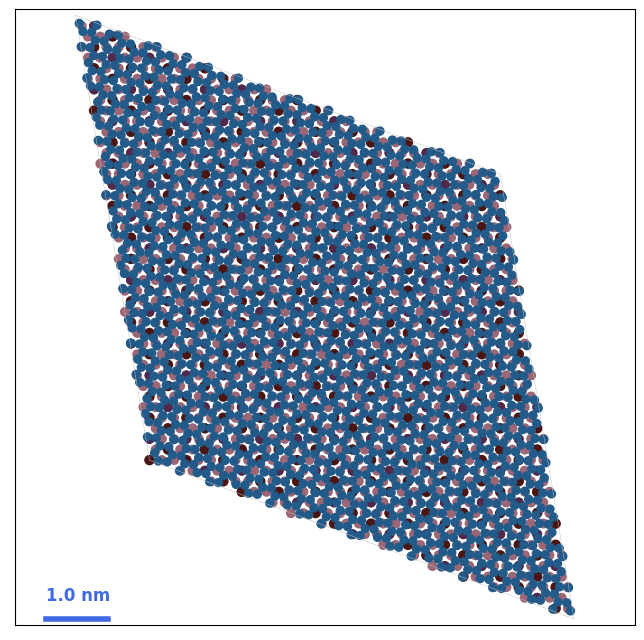

Espacio Reciproco:


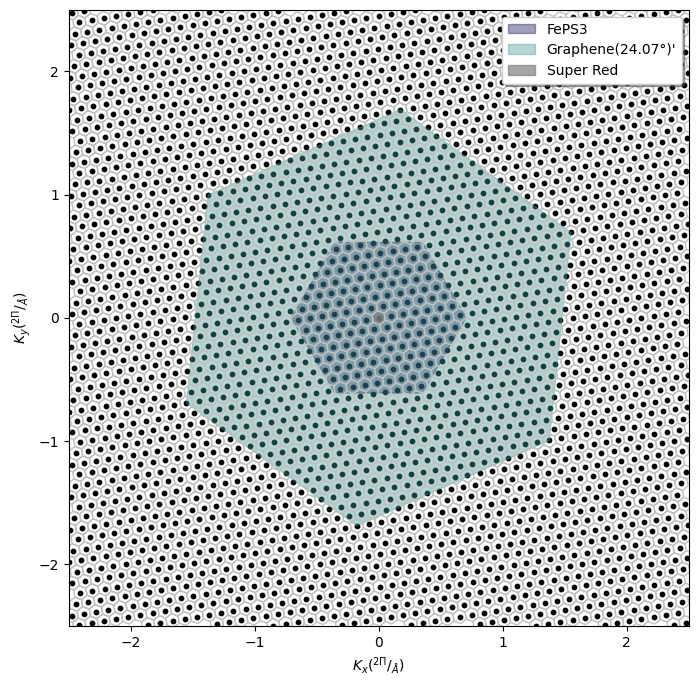

***La supercelda calculada está optimizada
Se deformó al menos una de las capas del sistema para hacerlo.


In [7]:
sOp,_ = sr.optimize_system(sr.loMat[2])

    Ahora el resultado más pequeño.

Matriz de trasformación:
	6	-9
	9	-3

Sistema [FePS3,Graphene(24.07°)] 
Celda unitaria con 1358 átomos:


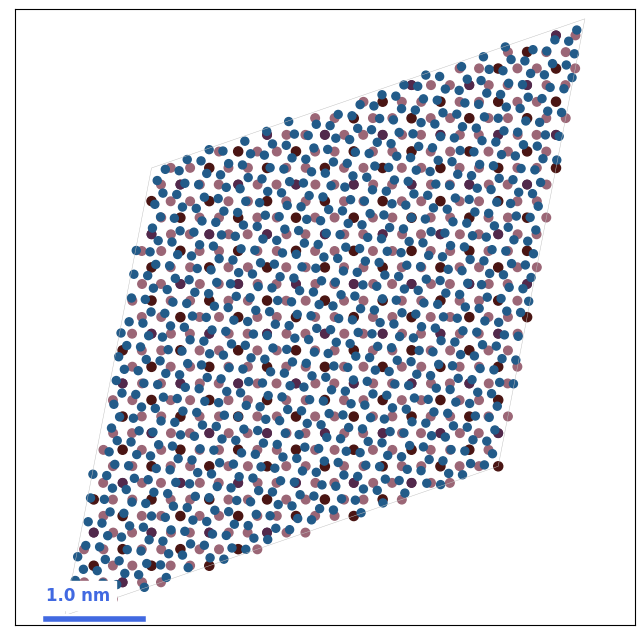

Espacio Reciproco:


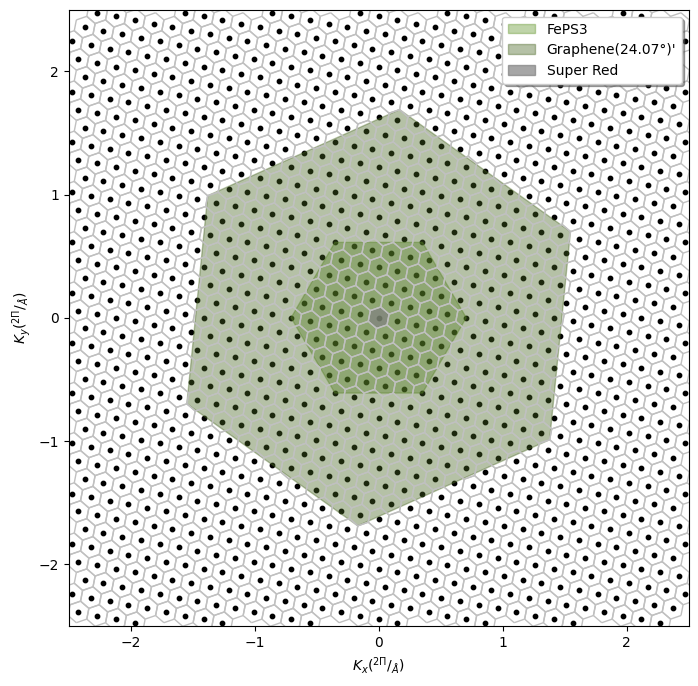

***La supercelda calculada está optimizada
Se deformó al menos una de las capas del sistema para hacerlo.


In [8]:
sMi,_ = sr.optimize_system(sr.loMat[0])

    Cómo observación se hace uso del método optimize_system para generar nuevos sistemas con cada MT para no modificar el sistema original.

    A continuación veremos las representaciones de ambos modelos en el espacio Real con la función 'showme', guardando a su vez las imagenes resultantes en archivos png

Dirección de imagen: '/images/ModeloOptimo.png'


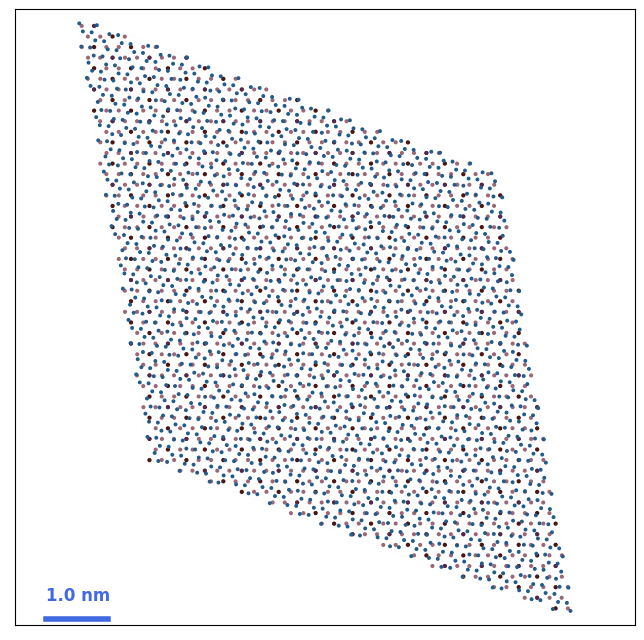

Dirección de imagen: '/images/ModeloMinimo.png'


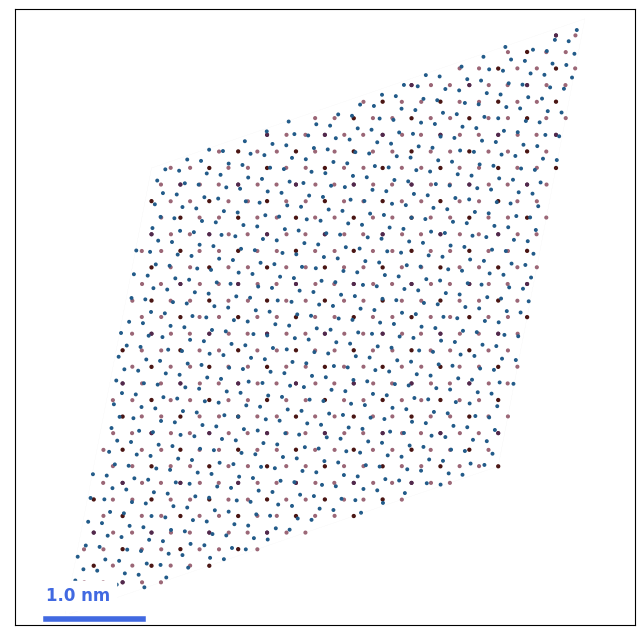

In [9]:
sOp.SuperRed.showme(t=1,iName="ModeloOptimo")
sMi.SuperRed.showme(t=1,iName="ModeloMinimo")

    Ahora usando la función 'exportLattice()' guardamos en la carpeta VASP_Files las CPs calculadas en archivos POSCAR

In [10]:
sOp.SuperRed.exportLattice(name="Sistema_Sugerido")
sMi.SuperRed.exportLattice(name="Sistema_Minimo")

1

    Continuamos generando las imagenes en elespacio reciproco para ambos resultados.

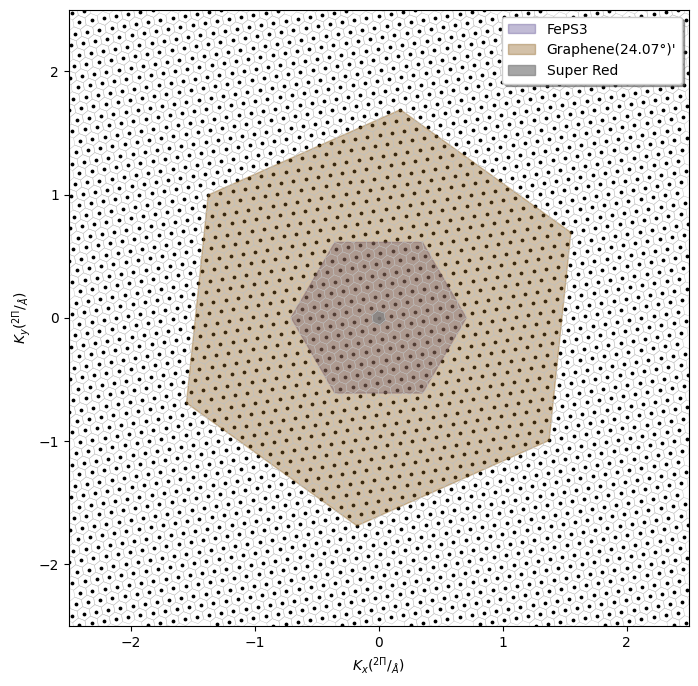

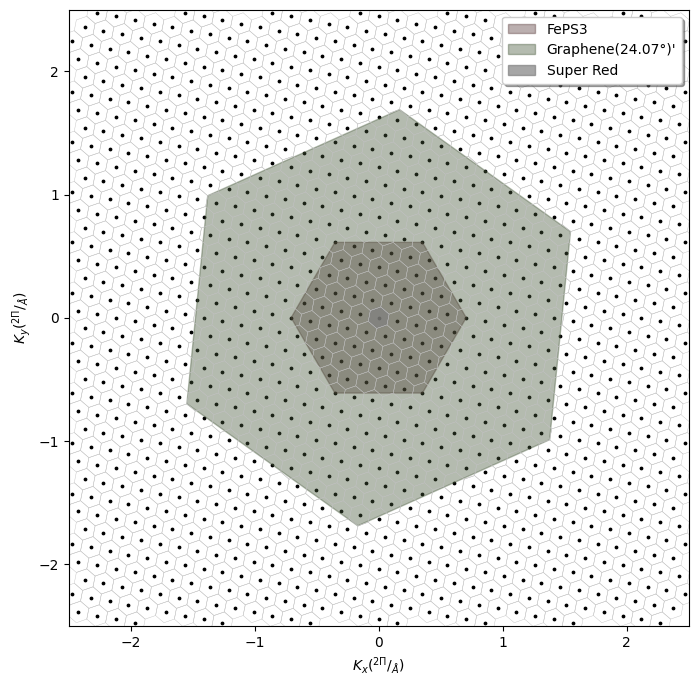

In [11]:
sOp.SuperRed.printReciprocalSpace(t=3,zoom=False)
sMi.SuperRed.printReciprocalSpace(t=3,zoom=False)

    Finalmente generamos sus patrones de difracción, estos deben ser muy parecidos dado que ambos sistemas aproximan al mismo.
    
    Este es el método más tardado, especialmente en el caso del primer sistema dado que el tamaño de este es mucho mayor al segundo.

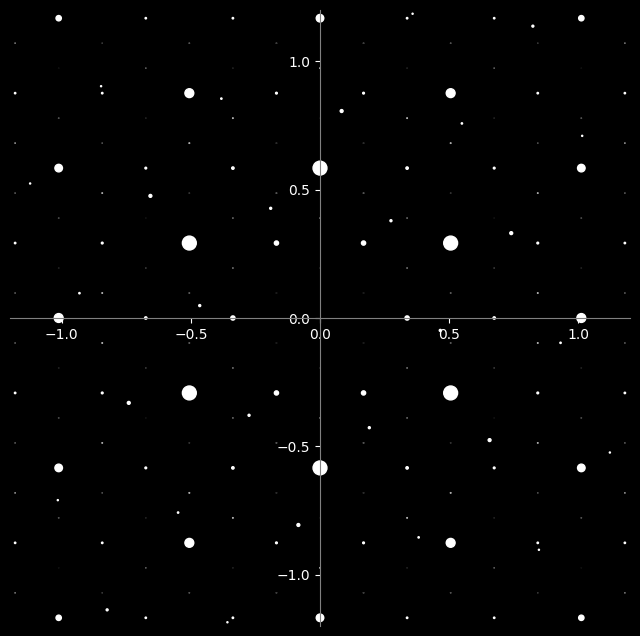

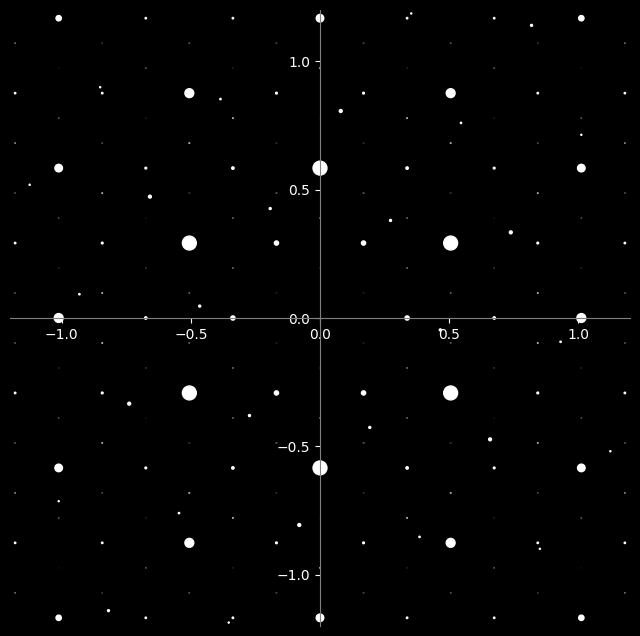

In [24]:
sOp.diffractionPattern(border=1.2)
sMi.diffractionPattern(border=1.2)

##### Tricapa de grafeno rotada
Ahora analizaremos una tricapa de grafeno con 10.43° entre la primera y segunda capa y 26.27 entre la primera y tercera capa utilizando el método ejecuta, el cual ejecuta secuancialmente los métodos searchLP y calculateTM regresando la MT sugerida por el programa.

In [12]:
g1=graphen()
g2=graphen().mRot(10.43)
g3=graphen().mRot(26.27)
g2.atms[0][0].color=g2.atms[0][1].color='red'
g3.atms[0][0].color=g2.atms[0][1].color='blue'

In [13]:
s = System([g1,g2,g3])
T = s.ejecuta(15,0.03)
s.leeMT(T)
TLG1,d=s.optimize_system(T,prnt=False)

Size of the primitive vectors: |a|=23.27612Å, |b|=23.27612Å
Angle between vectors: 120.000°
+-------------------------+---------------+-----------------------+-----------------------+--------+
|         Lattice         |       T       |      Deformation      |    Distortion:δ//θ    | #Atoms |
+-------------------------+---------------+-----------------------+-----------------------+--------+
|                         |  |   1    9|  |  | 1.00000  0.00000|  |    +0.0% // +0.0°     |  182   |
|         Grafeno         |  |  -9   10|  |  | 0.00000  1.00000|  |    +0.0% // +0.0°     |        |
|                         |               |                       |                       |        |
|                         |  |  -1   10|  |  | 0.99987  0.00025|  |    +0.0% // -0.01°    |  182   |
|     Grafeno(10.43°)     |  | -10    9|  |  |-0.00025  1.00013|  |    +0.0% // -0.01°    |        |
|                         |               |                       |                       |        |

    Generamos las imagenes de la CP encontrada para el sistema, una supercelda 2x2 de esta (guardando la imagen) y su representación en el espacio reciproco.

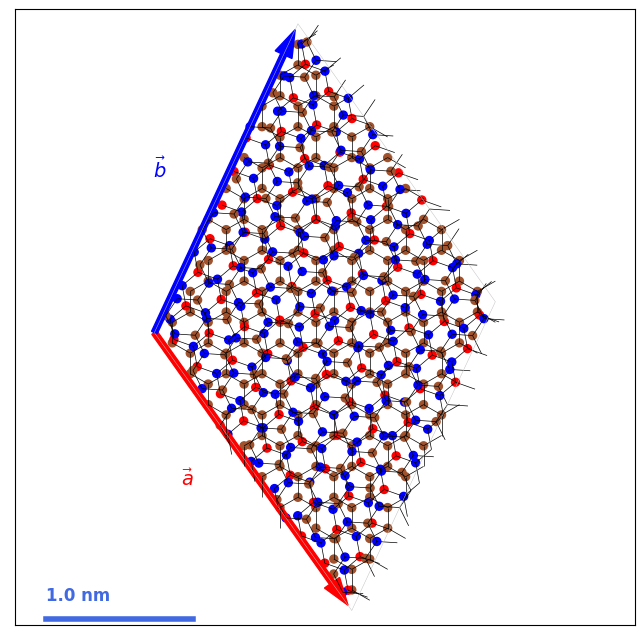

Dirección de imagen: '/images/TLG(1_43,26_27).png'


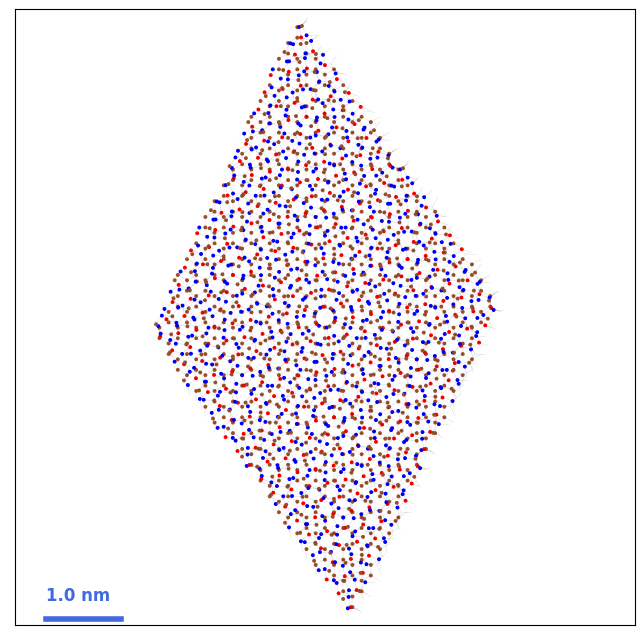

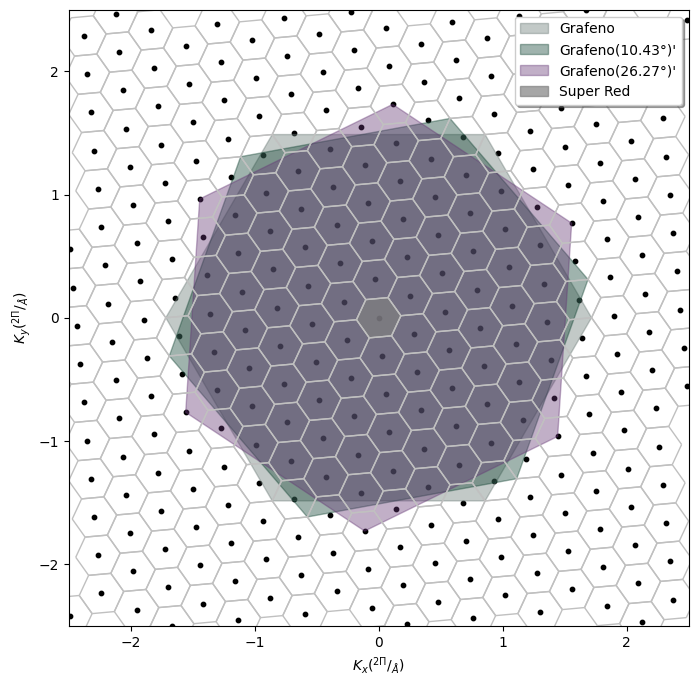

In [14]:
TLG1.showPC()
TLG1.SuperRed.showme(x=2,y=2,t=1,iName="TLG(1_43,26_27)")
TLG1.SuperRed.printReciprocalSpace()

###### Más pruebas

Regresamos al sistema de $FePS_3-Grafeno$, pero ahora con un ángulo de rotación de 13.9, que acepta un modelo más pequeño que el ángulo ya visto.

In [15]:
sr2 = System([l1,l2.mRot(13.9)])
sr2.searchLP(rangeOfSearch=10,epsilon=0.008)
sr2.calculateTM()
sr2.ShowTMs()


***Option 1: T <- Matrix loMat[0]
Size of the primitive vectors: |a|=17.79450Å, |b|=17.79450Å
Angle between vectors: 120.000°
+-------------------------+---------------+-----------------------+-----------------------+--------+
|         Lattice         |       T       |      Deformation      |    Distortion:δ//θ    | #Atoms |
+-------------------------+---------------+-----------------------+-----------------------+--------+
|                         |  |   0    3|  |  | 1.00000  0.00000|  |    +0.0% // +0.0°     |   90   |
|          FePS3          |  |  -3    3|  |  | 0.00000  1.00000|  |    +0.0% // +0.0°     |        |
|                         |               |                       |                       |        |
|                         |  |  -2    8|  |  | 1.00016  0.00004|  |   +0.018% // -0.0°    |  104   |
|    Graphene(13.90°)     |  |  -8    6|  |  |-0.00004  1.00020|  |   +0.018% // -0.0°    |        |
|                         |               |                      

[[0, 3], [-3, 3]]

Matriz de trasformación:
	0	3
	-3	3

Sistema [FePS3,Graphene(13.90°)] 
Celda unitaria con 194 átomos:


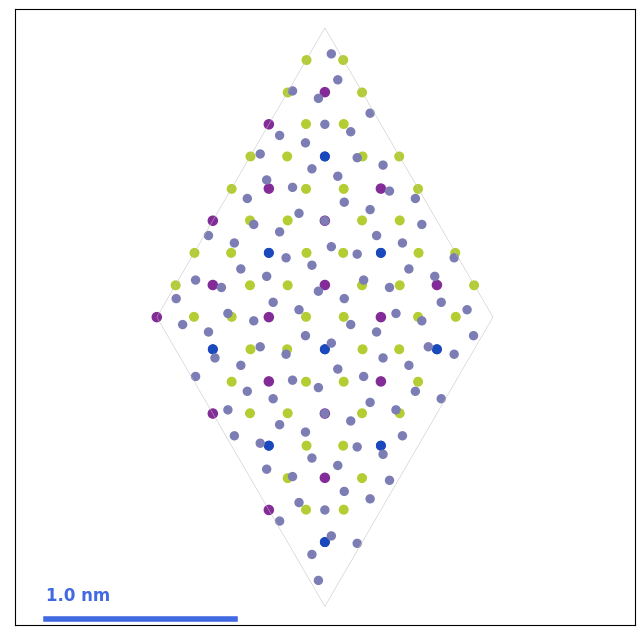

Espacio Reciproco:


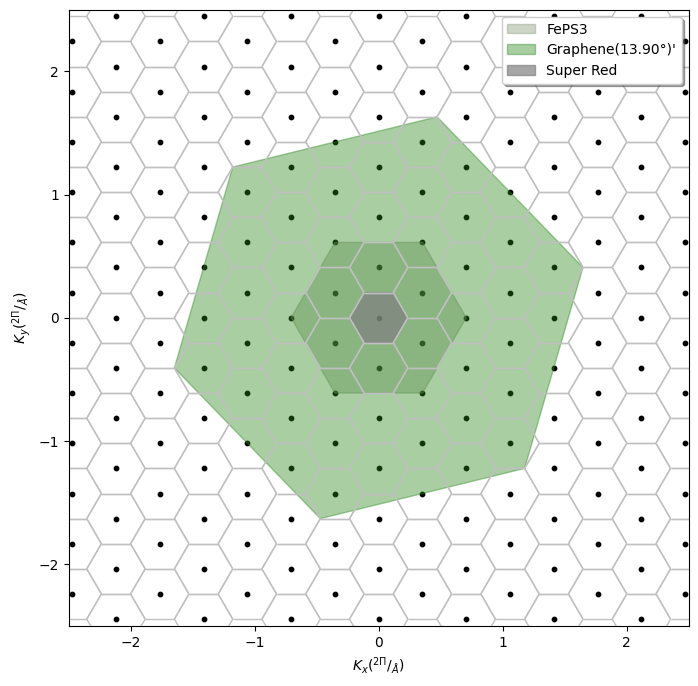

***La supercelda calculada está optimizada
Se deformó al menos una de las capas del sistema para hacerlo.
Matriz de trasformación:
	3	-6
	6	-3

Sistema [FePS3,Graphene(13.90°)] 
Celda unitaria con 582 átomos:


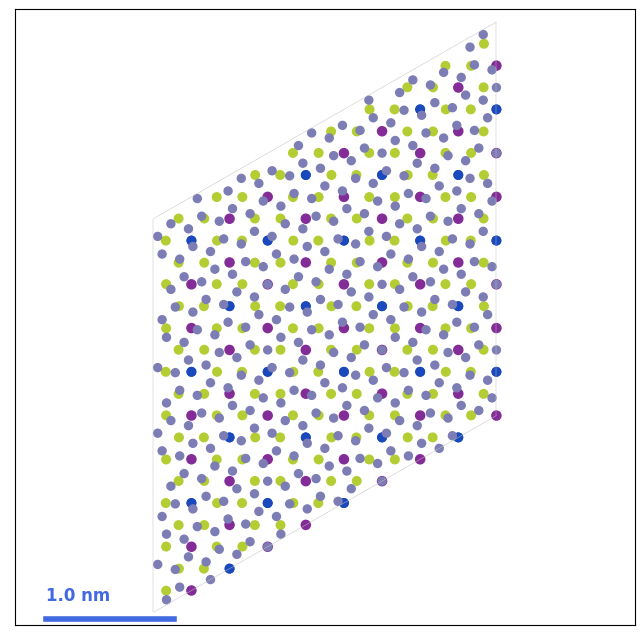

Espacio Reciproco:


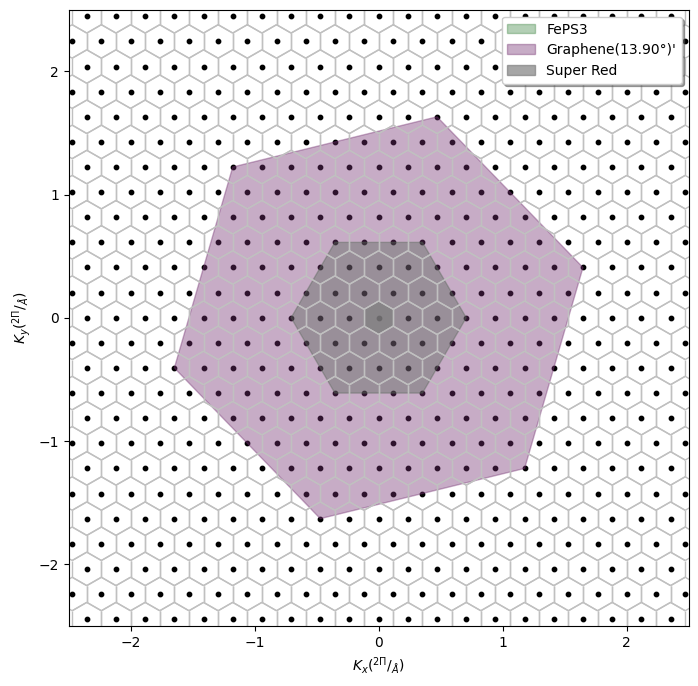

***La supercelda calculada está optimizada
Se deformó al menos una de las capas del sistema para hacerlo.


In [19]:
sr2_1,d3=sr2.optimize_system(sr2.loMat[0])
sr2_2,d3=sr2.optimize_system(sr2.loMat[1])

Dos tBLG con una rotación de $54.8^o$, en la primera ambas capas tienen 6 simetrias radiales; en la segunda,su capa sustrato tiene sólo 3 simetreias radiales, generando 2 sistemas distintos, el primero con empalmes de tipo AA en las esquinas de su CP y el segundo con empalmes de tipo AB. 

Matriz de trasformación:
	6	6
	-6	12

Sistema [Grafeno,Grafeno(10.43°)(54.80°)] 
Celda unitaria con 434 átomos:


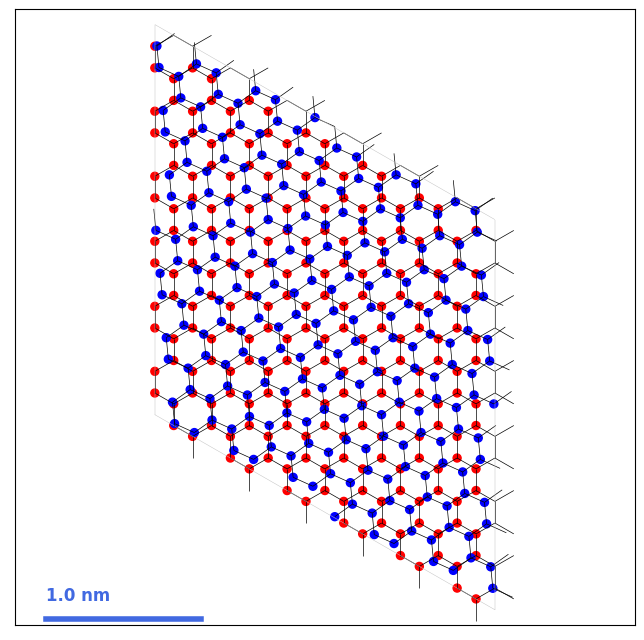

Espacio Reciproco:


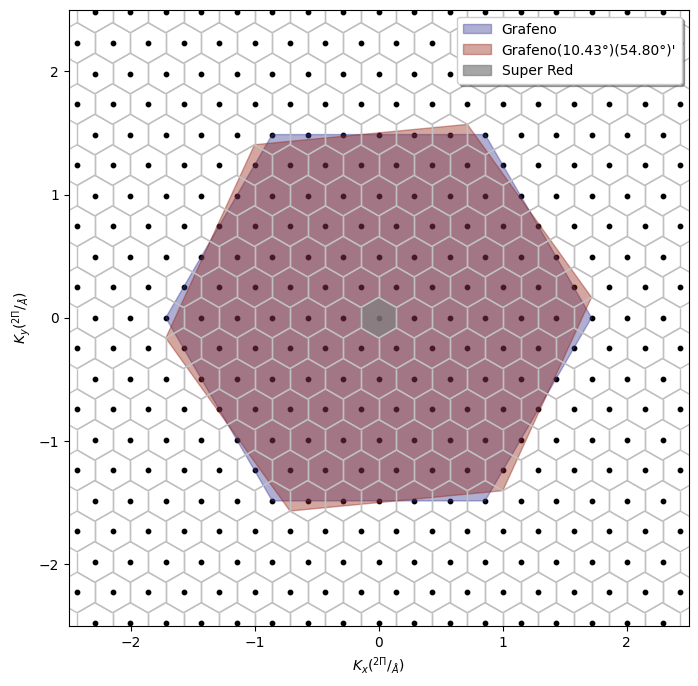

***La supercelda calculada está optimizada
Se deformó al menos una de las capas del sistema para hacerlo.
Matriz de trasformación:
	6	6
	-6	12

Sistema [Grafeno(s3),Grafeno(10.43°)(54.80°)] 
Celda unitaria con 434 átomos:


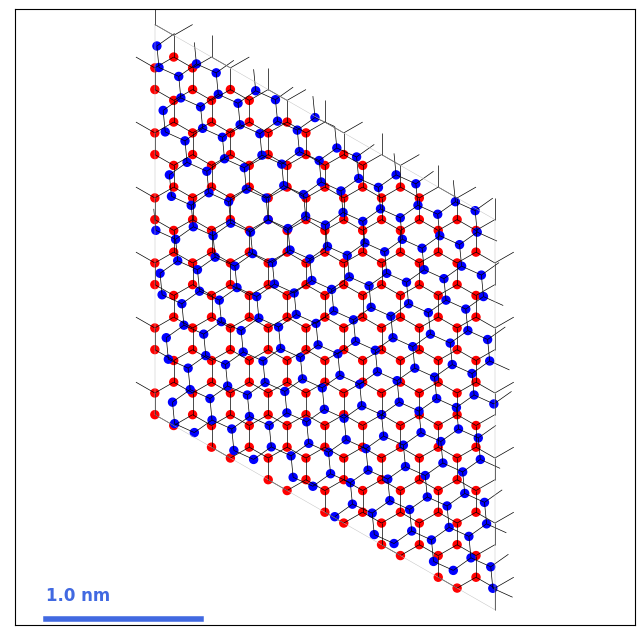

Espacio Reciproco:


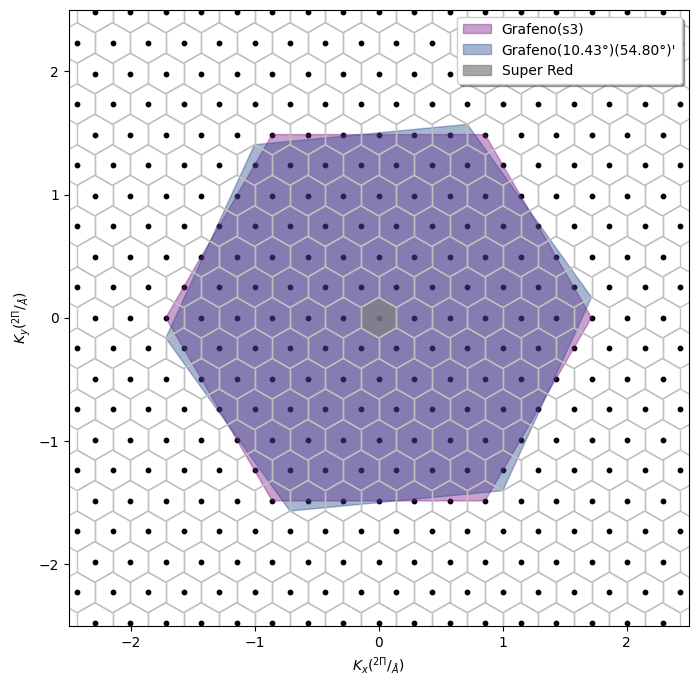

***La supercelda calculada está optimizada
Se deformó al menos una de las capas del sistema para hacerlo.


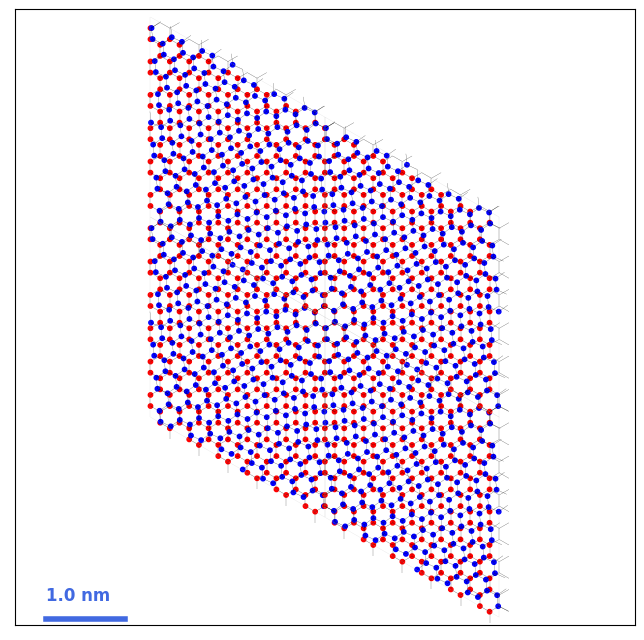

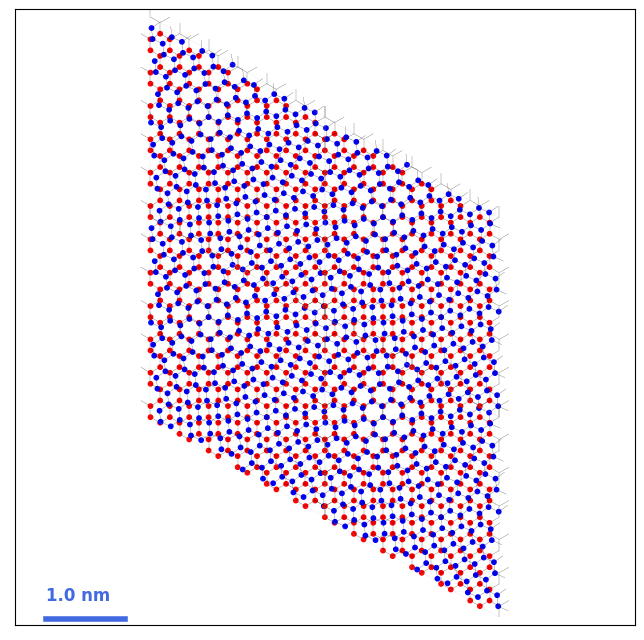

In [16]:
g1i=graphenC3()
g1.atms[0][0].color=g1.atms[0][1].color='red'
g1i.atms[0][0].color=g1i.atms[0][1].color='red'
g2.atms[0][0].color=g2.atms[0][1].color='blue'
sa=System([g1,g2.mRot(54.8)])
sb=System([g1i,g2.mRot(54.8)])
t=[[6, 6], [-6, 12]]
sa,d=sa.optimize_system(t)
sb,d=sb.optimize_system(t)
sa.SuperRed.showme(x=2,y=2,t=3)
sb.SuperRed.showme(x=2,y=2,t=3)

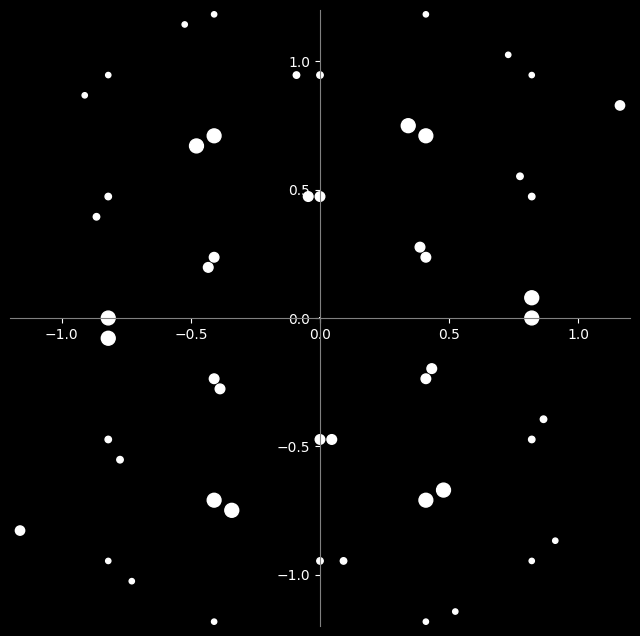

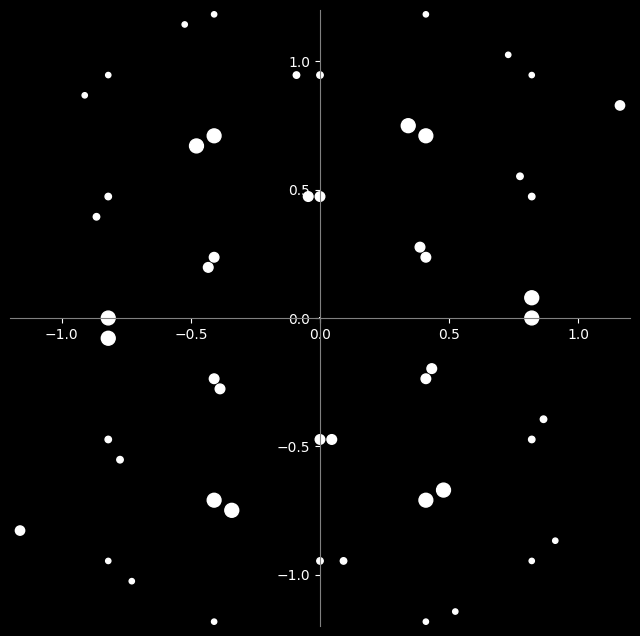

In [42]:
sa.diffractionPattern(border=1.2)
sb.diffractionPattern(border=1.2)

    Más ejemplos

Matriz de trasformación:
	11	9
	-9	20

Sistema [Grafeno,Grafeno(10.43°)(3.50°)] 
Celda unitaria con 1220 átomos:


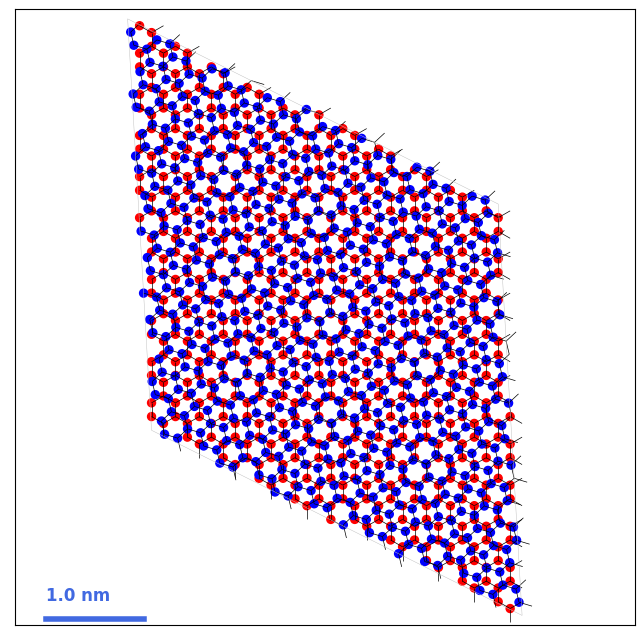

Espacio Reciproco:


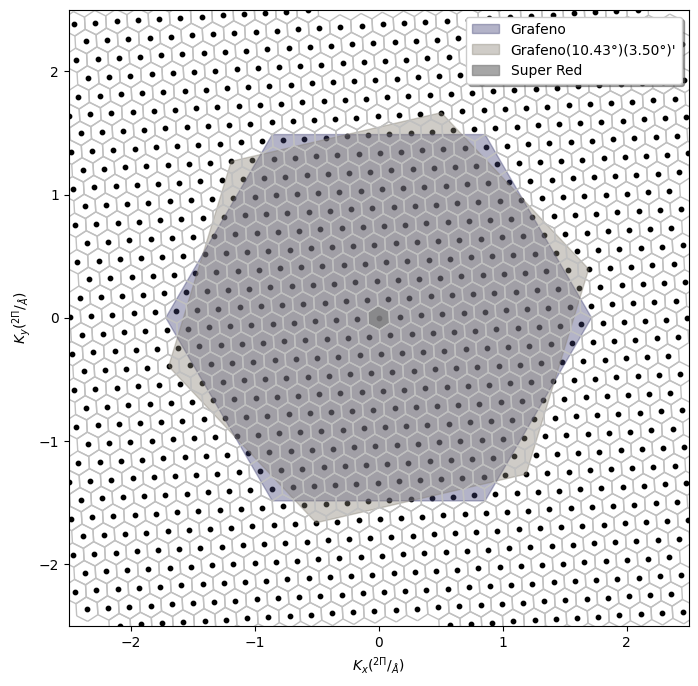

***La supercelda calculada está optimizada
Se deformó al menos una de las capas del sistema para hacerlo.
Matriz de trasformación:
	11	10
	-11	21

Sistema [Grafeno,Grafeno(10.43°)(3.50°)] 
Celda unitaria con 1354 átomos:


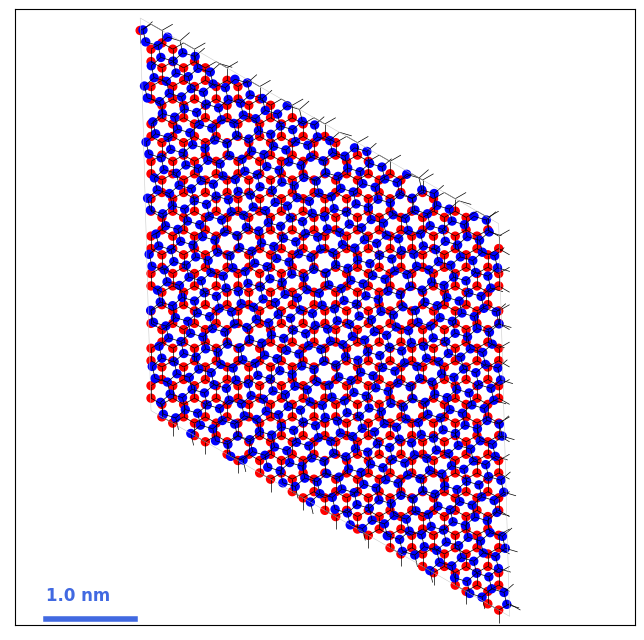

Espacio Reciproco:


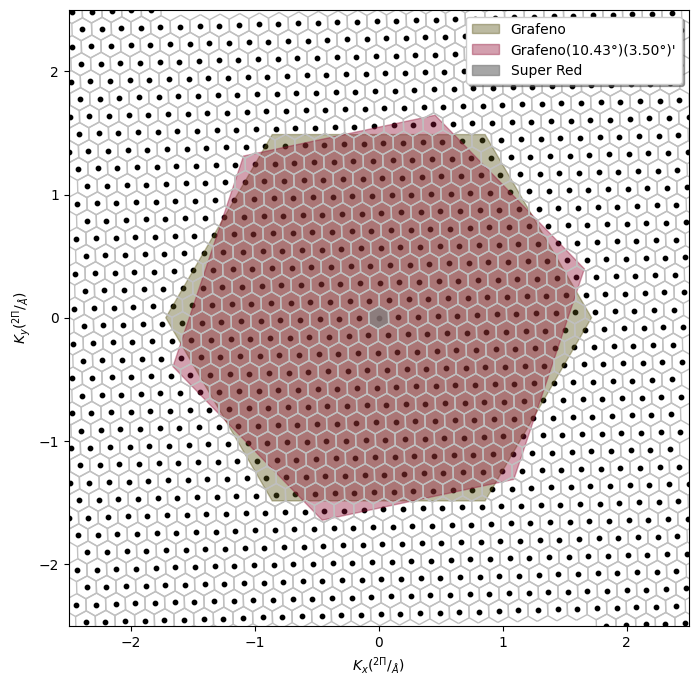

***La supercelda calculada está optimizada
Se deformó al menos una de las capas del sistema para hacerlo.


In [17]:
s1=System([g1,g2.mRot(3.5)])
s2=System([g1,g2.mRot(3.5)])
t1,t2=[[11,9],[-9,20]],[[11,10],[-11,21]]
s1,d=s1.optimize_system(t1)
s2,d=s2.optimize_system(t2)

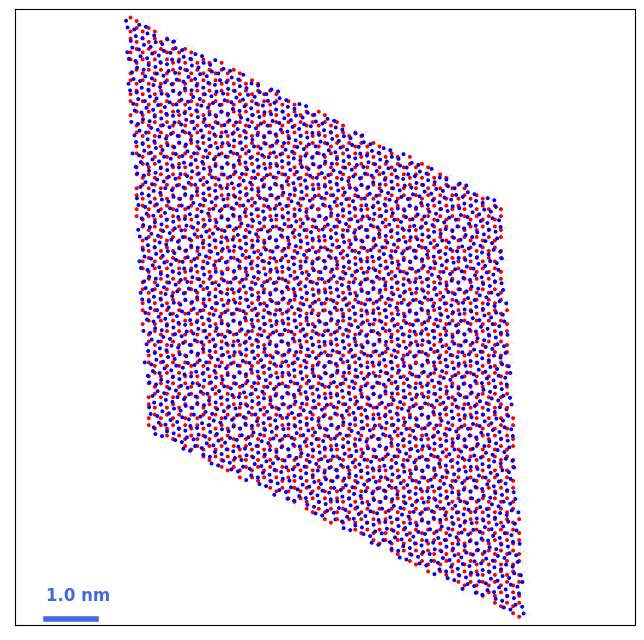

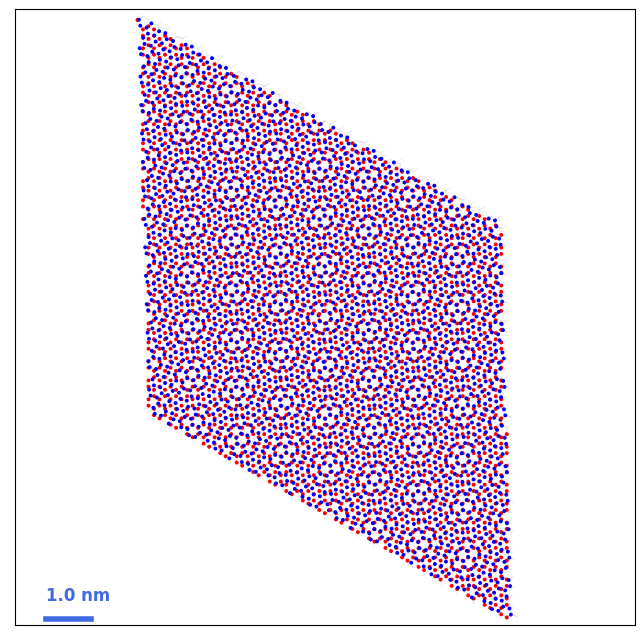

In [35]:
s1.SuperRed.showme(x=2,y=2,t=1)
s2.SuperRed.showme(x=2,y=2,t=1)